In [248]:
#Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [249]:
df=pd.read_csv("kaggle_diabetes.csv")

In [250]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [251]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [252]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [253]:
#Check if any column has any null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [254]:
#Let's check the size of the dataset
df.shape

(2000, 9)

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


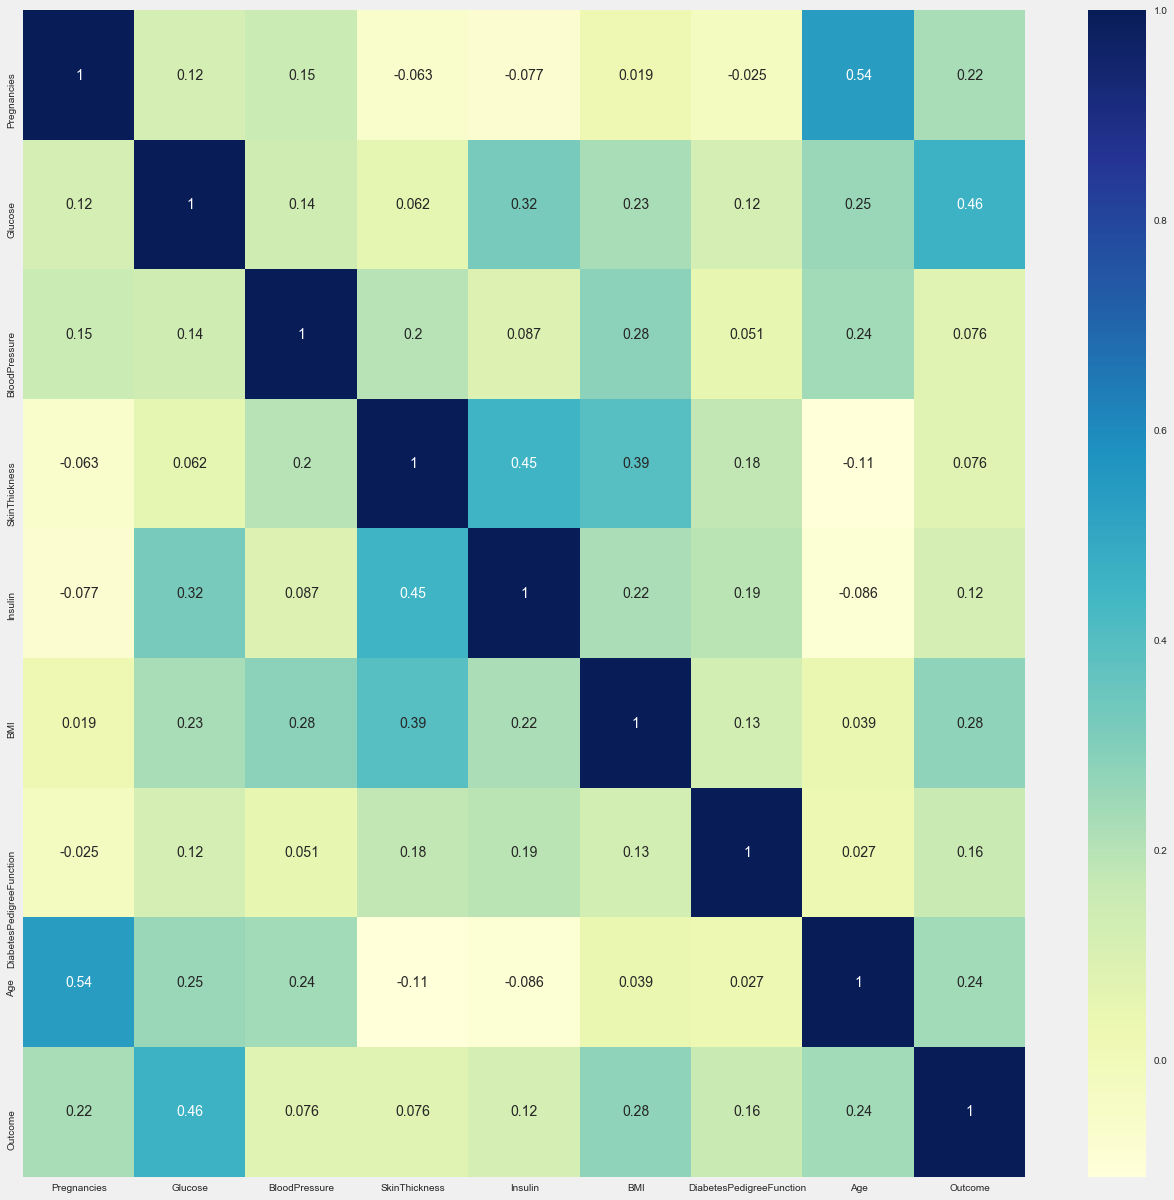

In [256]:
#Correlation
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [257]:

#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
corrmat=df.corr()
top_corr_features=corrmat.index


In [258]:
top_corr_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# DATA CLEANING

In [259]:
#Find missing zeroes in all columns
def number_of_zeroes(df, columns):
    for column in df.columns:
        print("The number of zeroes in column {} is {}".format(column,len(df[df[column]==0])))

In [260]:
number_of_zeroes(df, df.columns)

The number of zeroes in column Pregnancies is 301
The number of zeroes in column Glucose is 13
The number of zeroes in column BloodPressure is 90
The number of zeroes in column SkinThickness is 573
The number of zeroes in column Insulin is 956
The number of zeroes in column BMI is 28
The number of zeroes in column DiabetesPedigreeFunction is 0
The number of zeroes in column Age is 0
The number of zeroes in column Outcome is 1316


In [261]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [262]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [263]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fa7ffd0>,
      dtype=object)

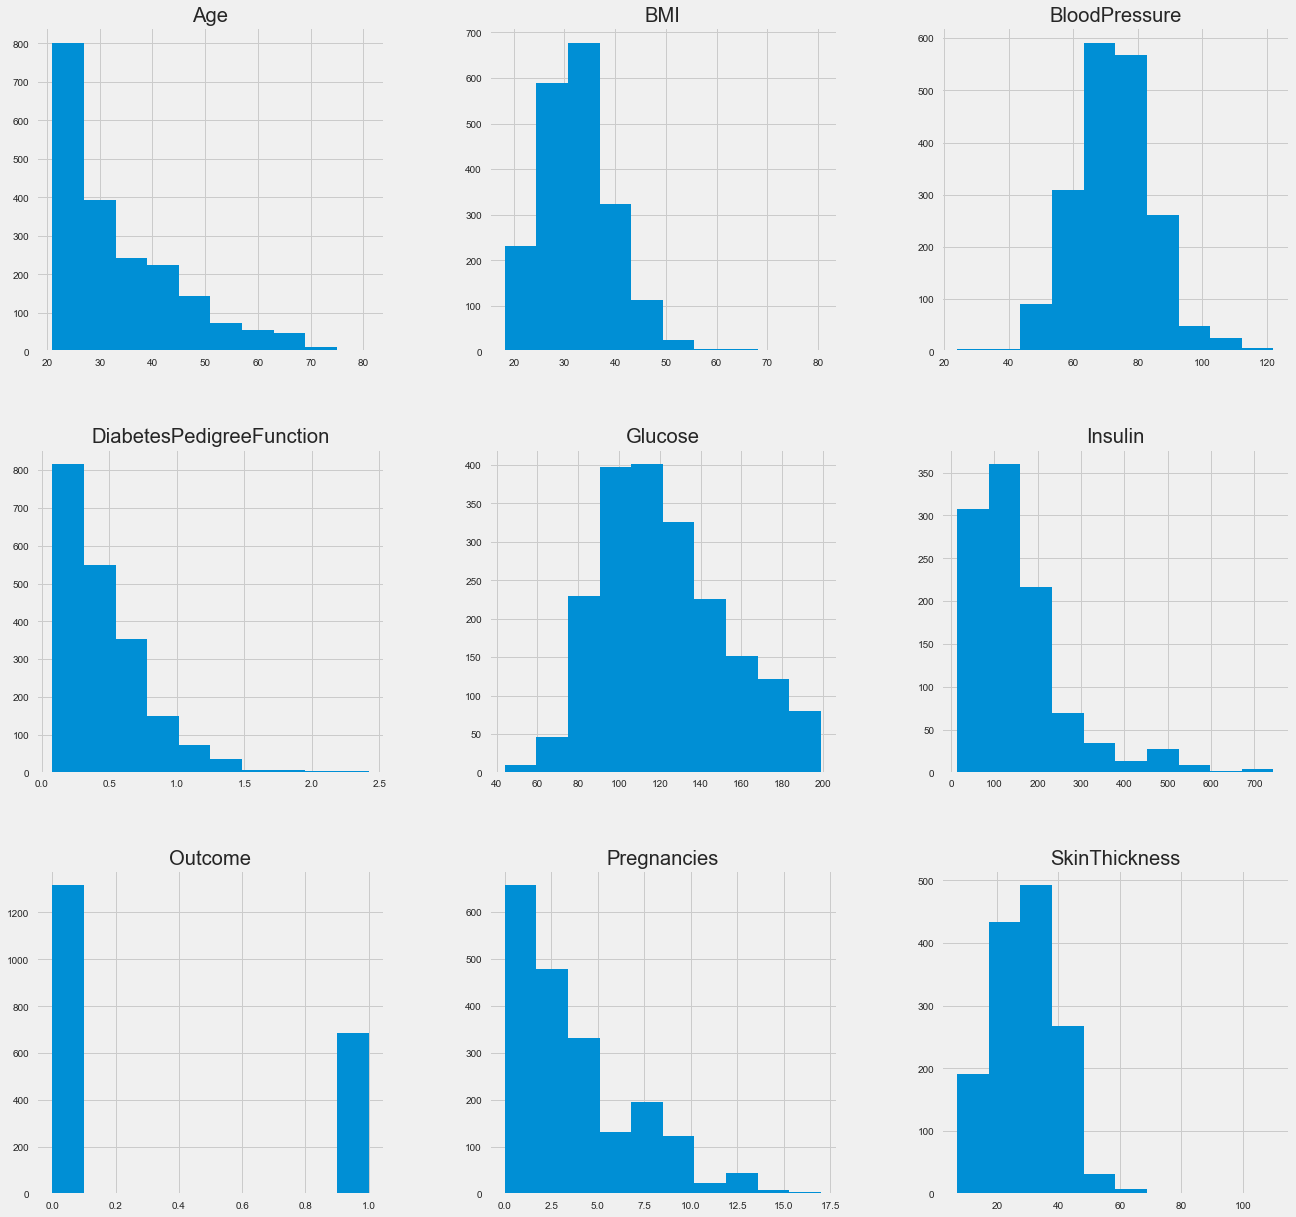

In [264]:
df.hist(figsize=(20,20))

In [265]:
#Now we will replace the outliers with mean or median depending on the distribution
df["BMI"].fillna(df["BMI"].median(), inplace=True)
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f8e5390>,
      dtype=object)

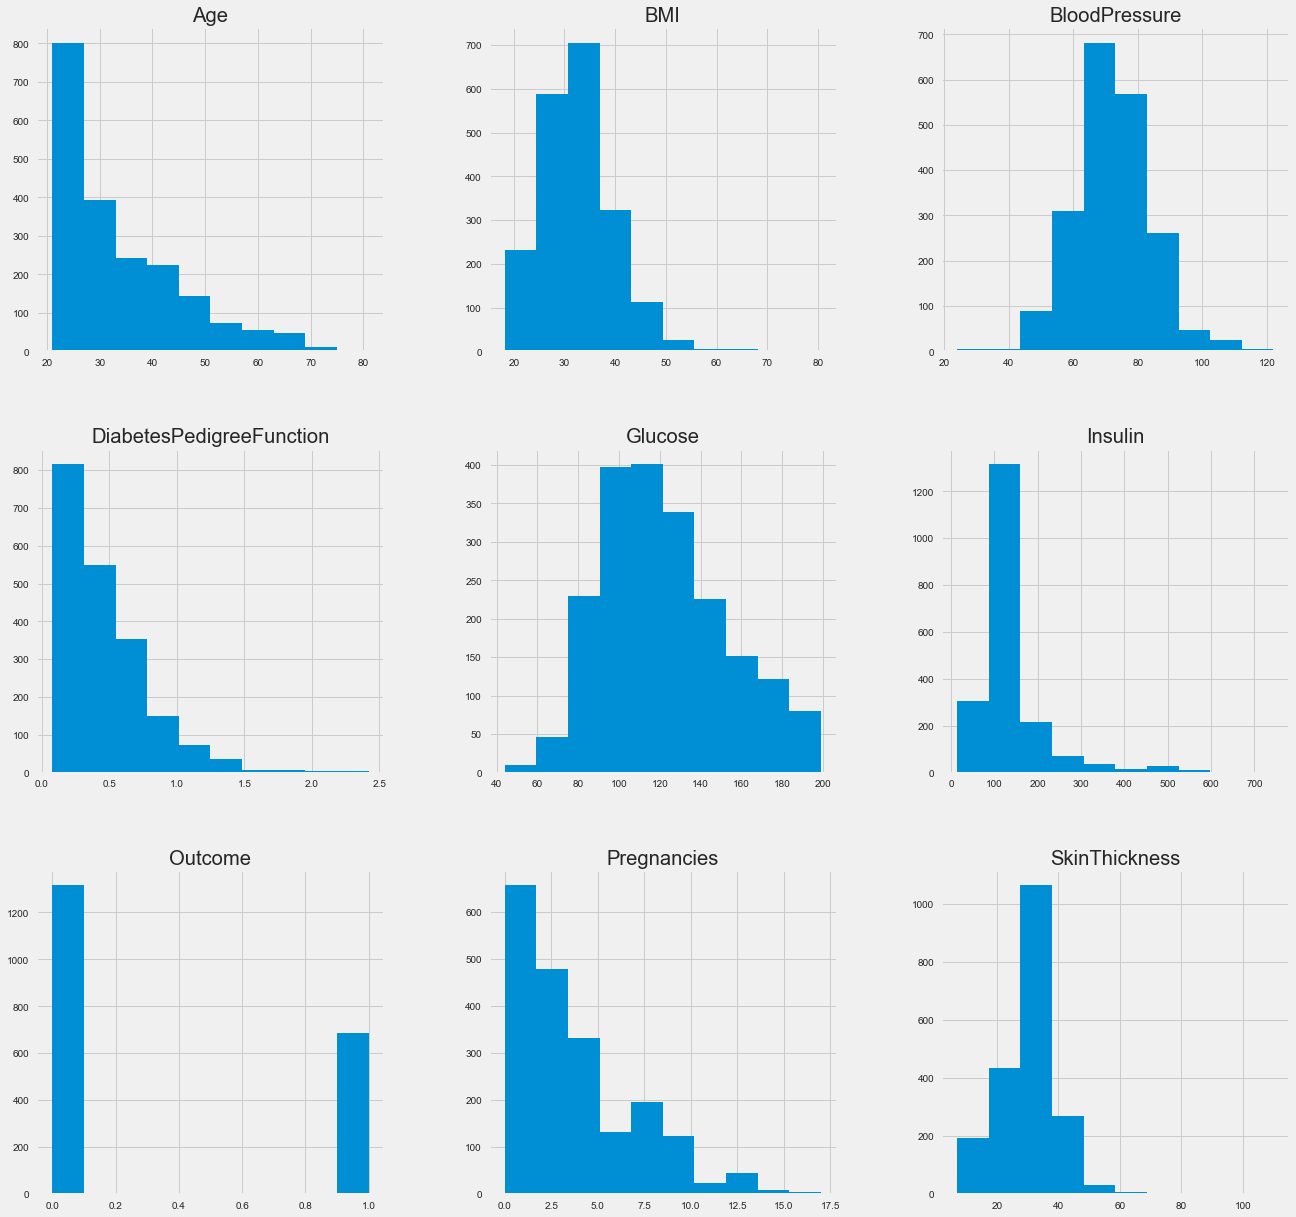

In [266]:
df.hist(figsize=(20,20))

In [267]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

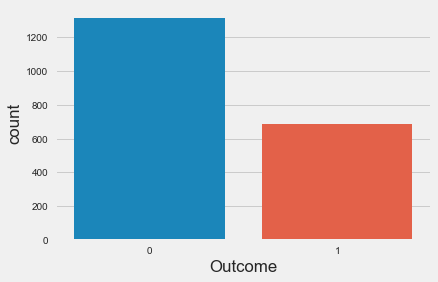

In [268]:
sns.countplot(x="Outcome", data=df)

In [269]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.0,40.7,0.536,21,0


# BUILD MODEL

In [270]:
# Splitting the dataset into train and test 
X= df.drop(["Outcome"], axis=1)
y=df["Outcome"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [271]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [272]:
#Let's import GridSearchCV along with the models to pick the best parameters from different models
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [273]:
# Creating a function to calculate best model for this problem
def find_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    scores = []
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(estimator=model_params['model'],param_grid= model_params['parameters'], cv=10, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.76750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.90875
2,random_forest,{'n_estimators': 100},0.96500
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.87250


#### We can see that RandomForest Algorithm has the highest accuracy rate

In [274]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10, scoring='accuracy').mean()

0.9618818850345716

In [275]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# MODEL EVALUATION

In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [277]:
y_pred=classifier.predict(X_test)

In [278]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[251   2]
 [  2 145]]


In [279]:
score=round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy score is {}%".format(score))

Accuracy score is 99.0%


In [280]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       253\n           1       0.99      0.99      0.99       147\n\n    accuracy                           0.99       400\n   macro avg       0.99      0.99      0.99       400\nweighted avg       0.99      0.99      0.99       400\n'

# PREDICTIONS!!!!

In [281]:
#Prediction function
def predict(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg=int(Pregnancies)
    gluc=float(Glucose)
    bp=float(BloodPressure)
    st= float(SkinThickness)
    ins=float(Insulin)
    bmi=float(BMI)
    dpi=float(DiabetesPedigreeFunction)
    age=int(Age)
    
    x=[[preg, gluc, bp, st, ins, bmi, dpi, age]]
    x=sc.transform(x)
    
    return classifier.predict(x)
    

In [282]:
#Prediction Case 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction= predict(1,139,62,41, 480,40.7, 0.536, 21)

if prediction==1:
    print("OOPS! You have diabetes, please consult a doctor")
else:
    print("Congrats! You do not have diabetes")

Congrats! You do not have diabetes


In [283]:
# Prediction Case 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict(0, 145, 72, 29, 126, 44.2, 0.63, 31)
if prediction==1:
  print("OOPS! You have diabetes, please consult a doctor")
else:
  print("Congrats! You do not have diabetes")

OOPS! You have diabetes, please consult a doctor


In [284]:
# Prediction Case 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict(2, 138, 62, 35, 126, 33.6, 0.127, 47)
if prediction==1:
  print("OOPS! You have diabetes, please consult a doctor")
else:
  print("Congrats! You do not have diabetes")

OOPS! You have diabetes, please consult a doctor
